In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
df_bank = pd.read_csv('bank-full.csv',sep=';')

**EDA (Exploratory Data Analysis)**

In [3]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df_bank.shape

(45211, 17)

In [5]:
df_bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df_bank.duplicated().sum()

0

In [8]:
# Check whether dataframe is balanced or not
y_valcounts = df_bank['y'].value_counts()
y_valcounts

no     39922
yes     5289
Name: y, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


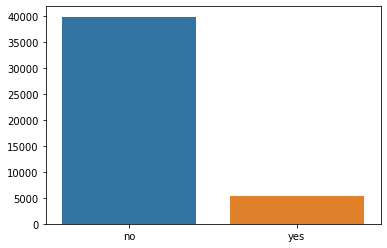

In [9]:
sns.barplot(y_valcounts.index, y_valcounts.values)

**Data Analysis Observations:** 

No null values exist.

No duplicates exist.

day, month and contact columns can be dropped since there is no influence on output.

Categorical columns types need to be changed from numeric to categorical.

Slightly imbalanced dataset but, has sufficient number of 'yes' records for model creation.

In [10]:
#drop day and month columns
df_bank = df_bank.drop(['day', 'month', 'contact'], axis=1)

In [11]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   duration   45211 non-null  int64 
 9   campaign   45211 non-null  int64 
 10  pdays      45211 non-null  int64 
 11  previous   45211 non-null  int64 
 12  poutcome   45211 non-null  object
 13  y          45211 non-null  object
dtypes: int64(6), object(8)
memory usage: 4.8+ MB


In [12]:
# Change columns to categorical
list_catg = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'y']

for i in list_catg: 
  df_bank[i] = df_bank[i].astype('category')

In [13]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   duration   45211 non-null  int64   
 9   campaign   45211 non-null  int64   
 10  pdays      45211 non-null  int64   
 11  previous   45211 non-null  int64   
 12  poutcome   45211 non-null  category
 13  y          45211 non-null  category
dtypes: category(8), int64(6)
memory usage: 2.4 MB


In [14]:
# Change the string categorical values to numbers
list_catg = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'y']

for i in list_catg: 
  df_bank[i] = df_bank[i].astype('category').cat.codes

In [15]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,198,1,-1,0,3,0


In [16]:
df_bank.corr()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
duration,-0.004648,0.004744,0.011852,0.001935,-0.010021,0.021560,0.005075,-0.012412,1.000000,-0.084570,-0.001565,0.001203,0.010925,0.394521
campaign,0.004760,0.006839,-0.008994,0.006255,0.016822,-0.014578,-0.023599,0.009980,-0.084570,1.000000,-0.088628,-0.032855,0.101588,-0.073172


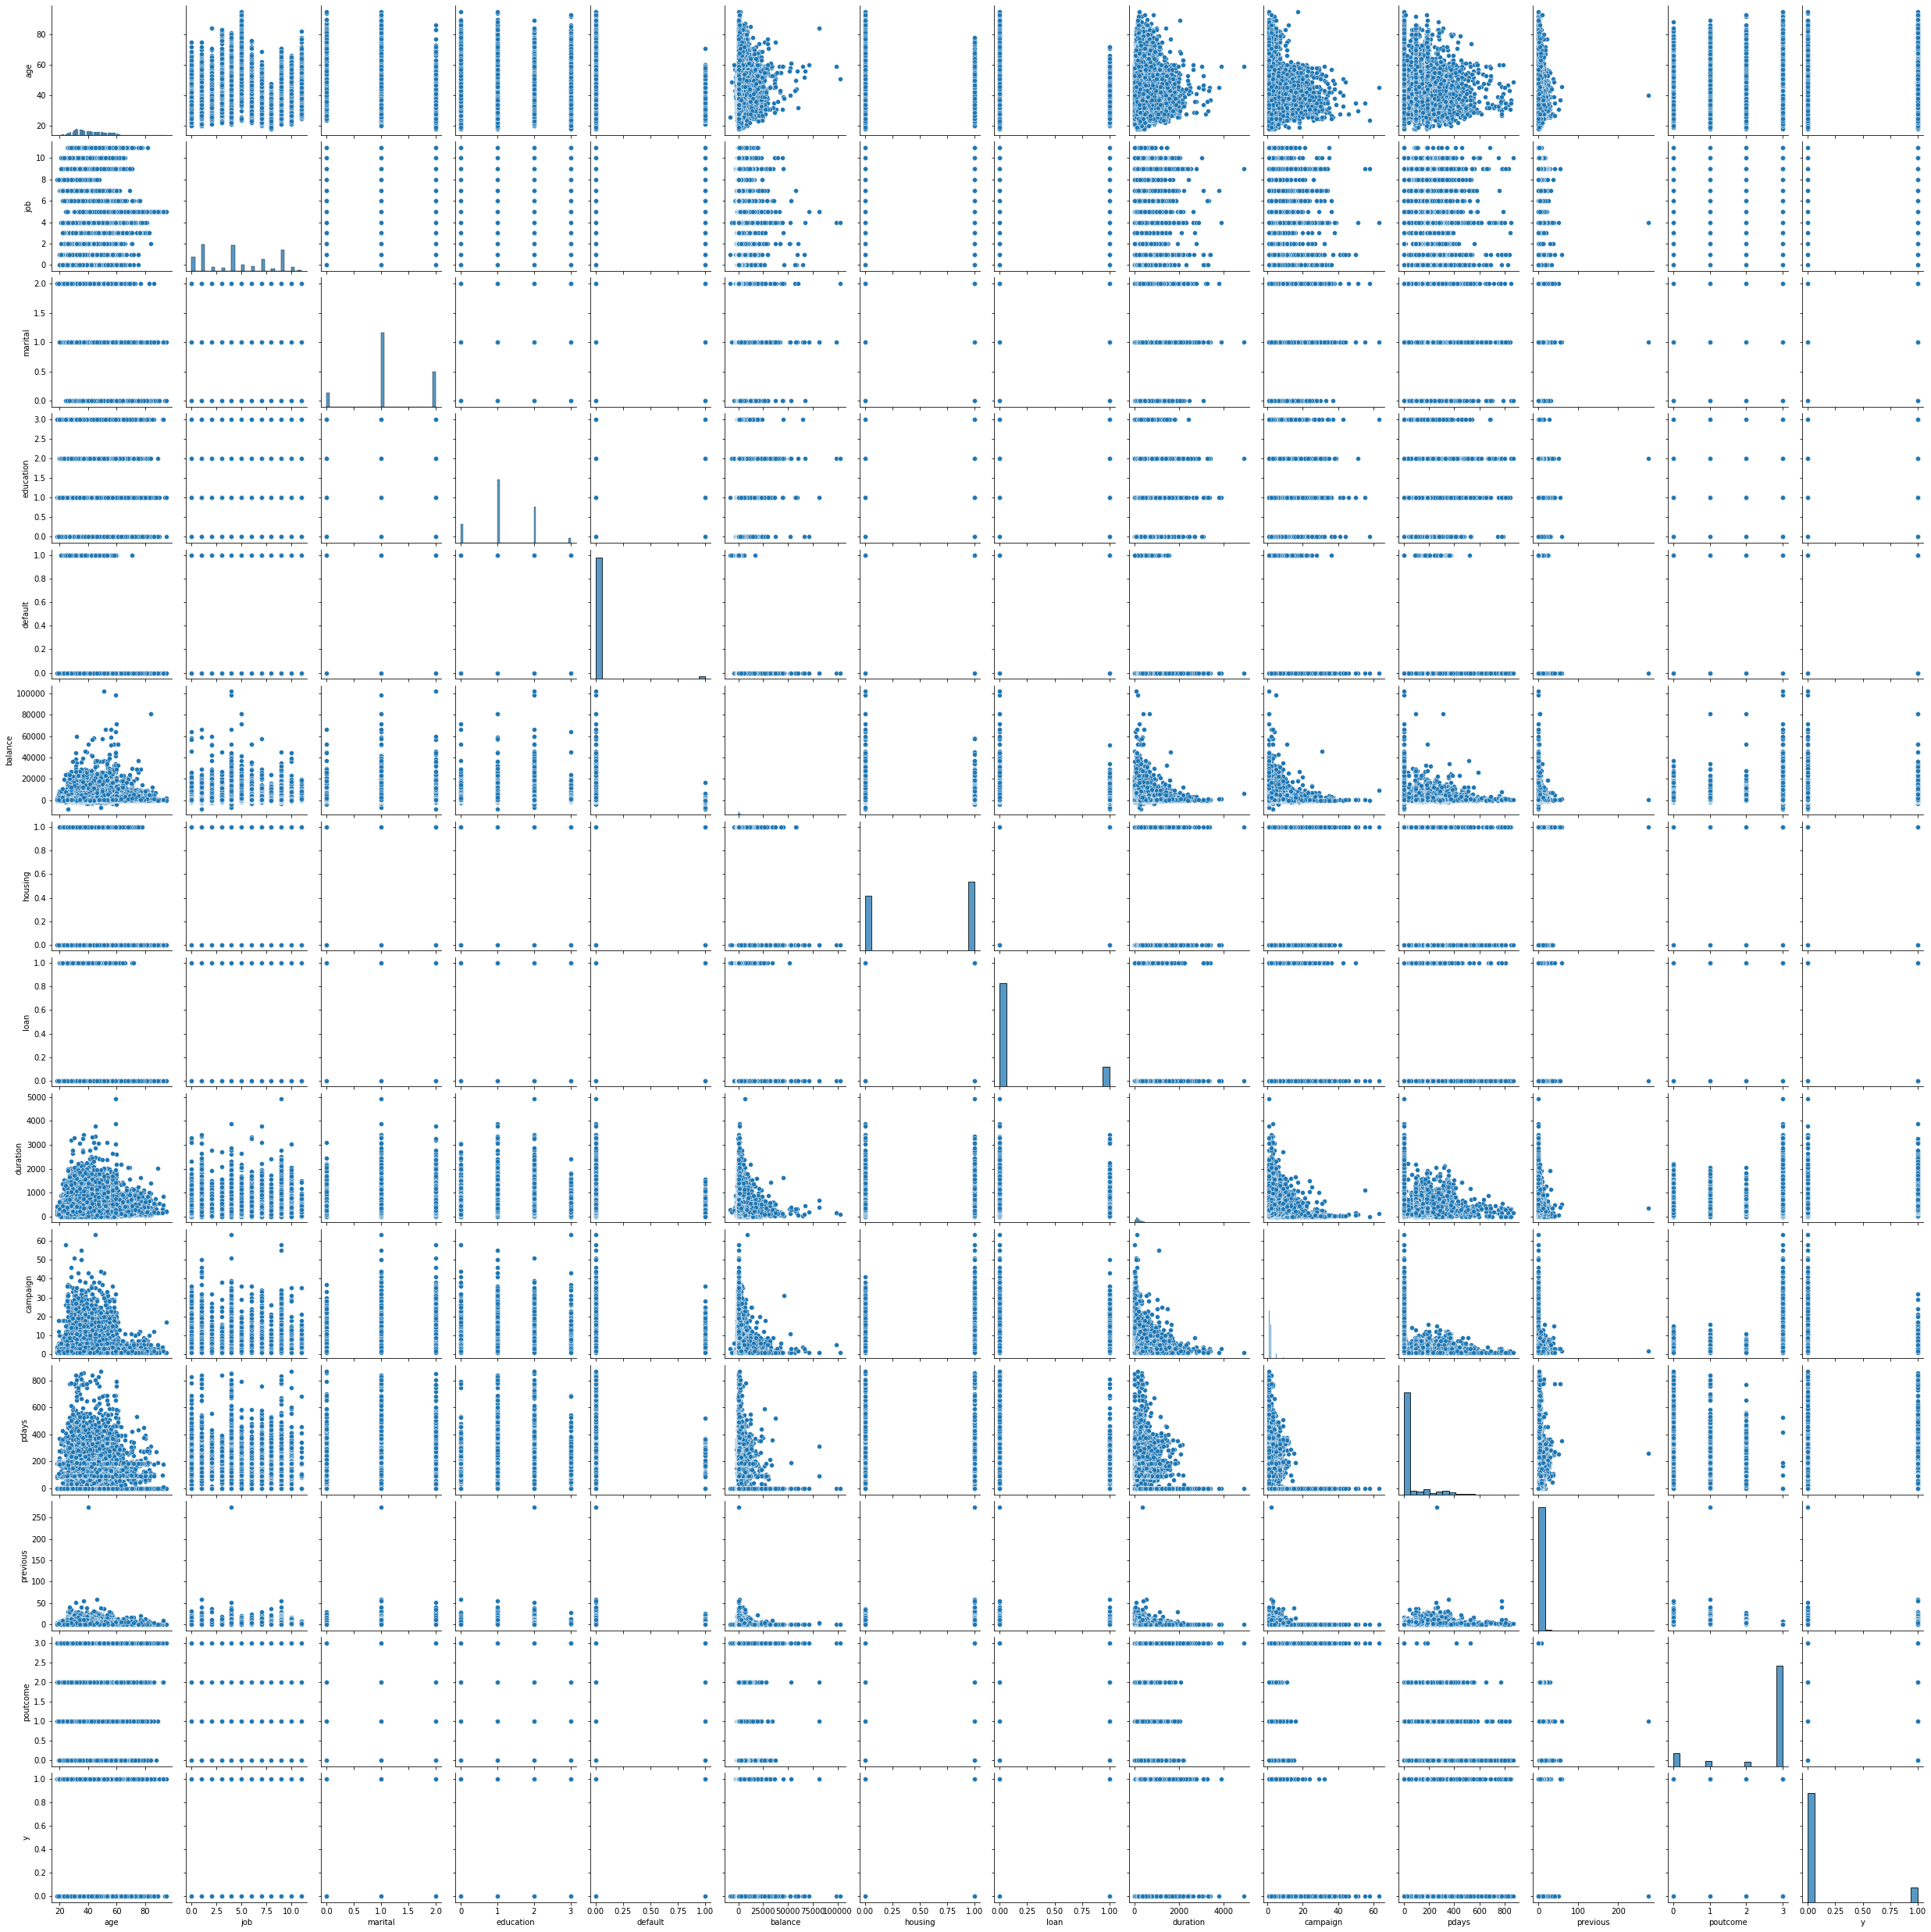

In [17]:
#sns.pairplot(df_bank)

Observation: No collinearity exist between input variables.

**Train and Test data creation from given Dataframe**

In [18]:
# Dividing out data into input and output variables
x = df_bank.iloc[:,0:-1]
Y = df_bank.iloc[:,-1]

In [19]:
x.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,198,1,-1,0,3


In [20]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int8

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=123)

In [23]:
print(x_train.shape)
print(x_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(36168, 13)
(9043, 13)
(36168,)
(9043,)


**Logistic Regression Model creation**

In [24]:
classifier = LogisticRegression()
classifier.fit(x_train,Y_train)
# classifier.write_to_pickle('Path of file.pkl')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [25]:
# Predict for new X data
# classifier.read_pickle_file('path of file.pkl')
y_pred_train = classifier.predict(x_train)
y_pred_test = classifier.predict(x_test)

In [26]:
y_pred_test.shape

(9043,)

In [27]:
y_pred_df_train = pd.DataFrame({'actual': Y_train, 'predicted': classifier.predict(x_train)})
y_pred_df_train

,actual,predicted
28686,0,0
9304,0,0
41425,1,0
44803,0,0
5878,0,0
...,...,...
7763,1,0
15377,0,0
17730,0,0
28030,0,0


In [28]:
y_pred_df_test = pd.DataFrame({'actual': Y_test, 'predicted': classifier.predict(x_test)})
y_pred_df_test

,actual,predicted
7281,1,0
19469,0,0
31637,0,0
22484,0,0
35919,0,0
...,...,...
20374,1,0
24169,1,0
15737,0,0
18893,0,0


In [29]:
# Confusion matrix for model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix_train = confusion_matrix(Y_train, y_pred_train)
print(confusion_matrix_train)

[[31403   533]
 [ 3514   718]]


In [30]:
## Accuracy of train data
accuracy_train = (31403+718)/(31403+718+533+3514)
accuracy_train

0.8881055076310551

In [31]:
# Confusion matrix for model accuracy
#from sklearn.metrics import confusion_matrix
confusion_matrix_test = confusion_matrix(Y_test, y_pred_test)
print(confusion_matrix_test)

[[7865  121]
 [ 880  177]]


In [32]:
## Accuracy of test data
accuracy_test = (7865+177)/(7865+177+121+880)
accuracy_test

0.8893066460245493

In [33]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31936
           1       0.57      0.17      0.26      4232

    accuracy                           0.89     36168
   macro avg       0.74      0.58      0.60     36168
weighted avg       0.86      0.89      0.86     36168



In [34]:
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7986
           1       0.59      0.17      0.26      1057

    accuracy                           0.89      9043
   macro avg       0.75      0.58      0.60      9043
weighted avg       0.86      0.89      0.86      9043



In [35]:
Y_pred_prob = classifier.predict_proba(x_train)[:,1]
Y_pred_prob

array([0.1086801 , 0.05244934, 0.15891026, ..., 0.14109578, 0.10630747,
       0.01634797])

Text(0, 0.5, 'True Postive Rate')

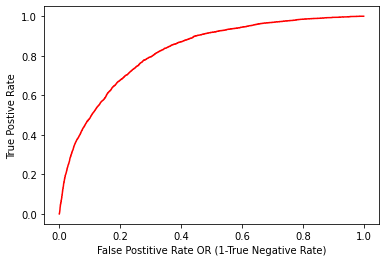

In [36]:
# ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y_train, classifier.predict_proba(x_train)[:,1]) ## Gets prediction probabilities
auc = roc_auc_score(Y_train, y_pred_train)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model (area = %0.2f)'%auc)
#plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Postitive Rate OR (1-True Negative Rate)')
plt.ylabel('True Postive Rate')

In [37]:
auc

0.5764850530455997